## 2D Phasespace Plots

We have particle data at a location in the accelerator. Let's plot phasespace distribution of particles.

### File I/O

Read particle data from a file ('coord.out')

In [1]:
import numpy as np

In [2]:
particle = np.loadtxt('hw/coord.out', skiprows=1, dtype=float)
print (particle)

[[ 0.0000e+00  1.0000e+00  8.2634e-08 ...  3.0776e-02  1.9325e-05
   3.1892e-02]
 [ 0.0000e+00  1.0000e+00 -1.1558e+01 ...  8.7582e+00 -1.6615e-01
   8.0275e+00]
 [ 0.0000e+00  1.0000e+00  8.0130e-01 ... -2.9157e+00 -3.8427e-02
   1.3129e+01]
 ...
 [ 0.0000e+00  1.0000e+00 -1.1617e+01 ...  7.7016e+00 -6.1860e-02
  -4.8626e+00]
 [ 0.0000e+00  1.0000e+00  1.6378e+01 ...  1.9709e+01 -1.7698e-02
  -5.3058e+00]
 [ 0.0000e+00  1.0000e+00  5.3429e+00 ... -3.6098e+00 -6.4271e-02
   2.0248e+01]]


In [3]:
x = particle[:,4]
xp = particle[:,5]

In [4]:
print (x)
print (xp)

[ 0.00085039 -0.046729   -0.010348   ... -0.072774    0.047119
  0.20461   ]
[ 0.030776  8.7582   -2.9157   ...  7.7016   19.709    -3.6098  ]


### Scatter plot

In [5]:
from matplotlib import pyplot as plt

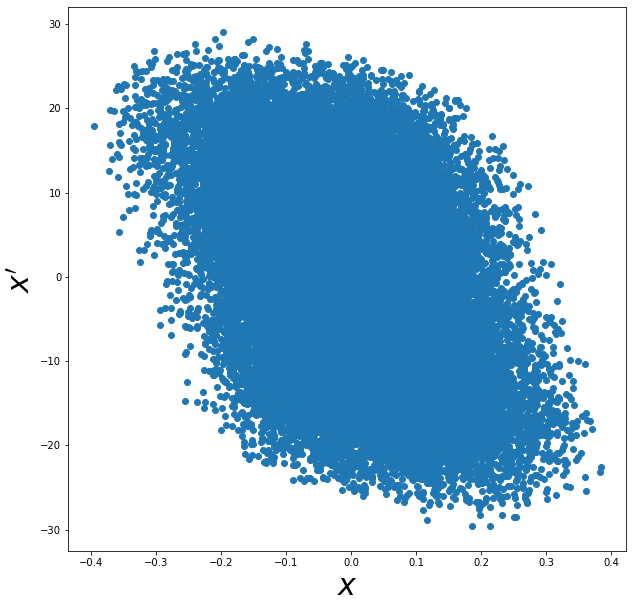

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x, xp)
plt.xlabel(r'$x$', fontsize=30)
plt.ylabel(r'$x^{\prime}$', fontsize=30)
#plt.grid()
plt.show()

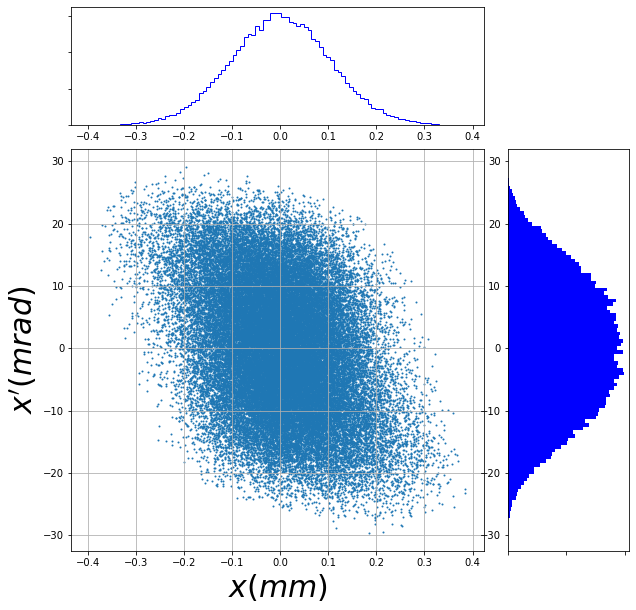

In [7]:
fig = plt.figure(figsize=(10,10))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x (mm)$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime} (mrad)$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='stepfilled', orientation='horizontal', color='b')
        
plt.show()

In [8]:
def get_norm_coords(u, v, a, b):
    retx = u / np.sqrt(b)
    rety = (a * u + b * v) / np.sqrt(b)
    return (retx, rety)

In [9]:
alpha_x = 0.399
beta_x = 0.0109

nx, nxp = get_norm_coords(x, xp, alpha_x, beta_x)
print (nx)
print (nxp)

[ 0.00814526 -0.44758264 -0.09911586 ... -0.6970485   0.45131817
  1.95980836]
[ 0.00646307  0.73579745 -0.34395525 ...  0.52594829  2.23775596
  0.40508935]


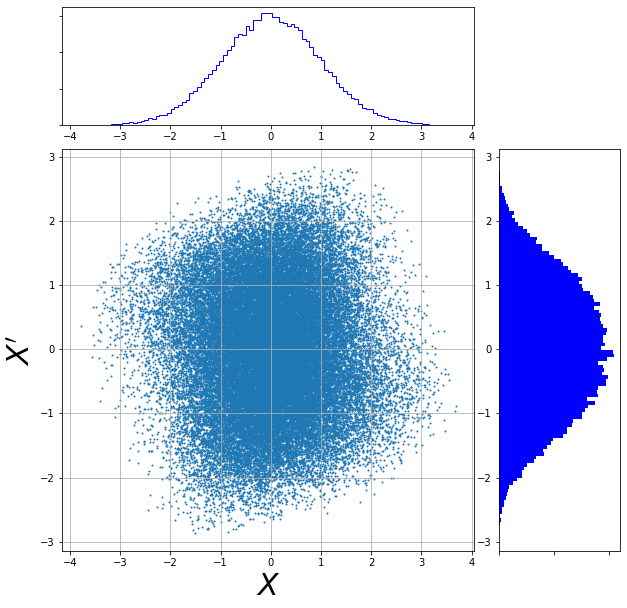

In [10]:
fig = plt.figure(figsize=(10,10))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(nx, nxp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$X$', fontsize=30)
main_ax.set_ylabel(r'$X^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(nxp, 100, histtype='stepfilled', orientation='horizontal', color='b')
        
plt.show()

### Density plot

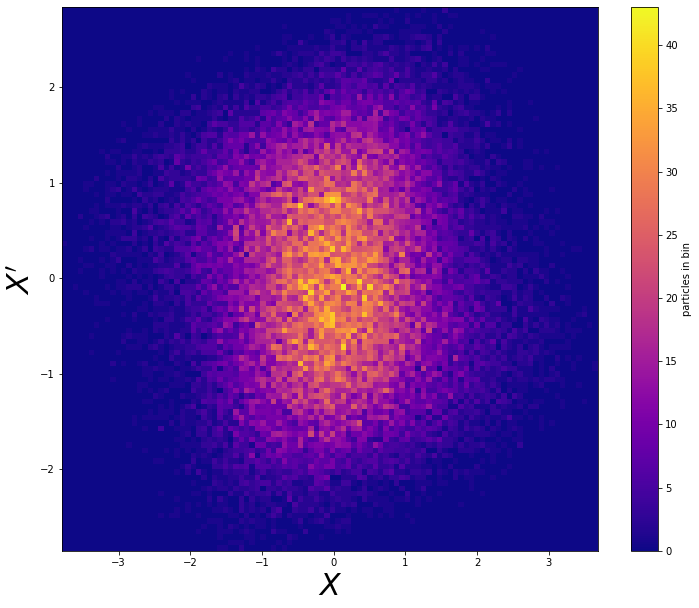

In [11]:
fig = plt.figure(figsize=(12,10))
plt.hist2d(nx, nxp, bins=100, cmap=plt.cm.plasma)
plt.xlabel(r'$X$', fontsize=30)
plt.ylabel(r'$X^{\prime}$', fontsize=30)
cb = plt.colorbar()
cb.set_label('particles in bin')

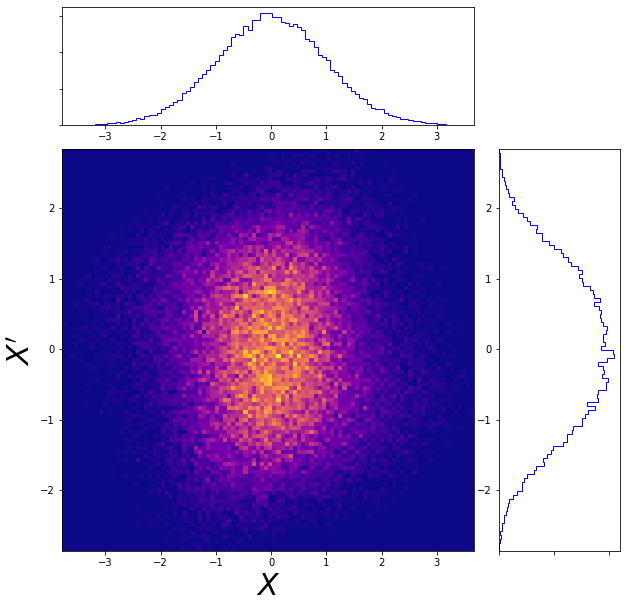

In [12]:
fig = plt.figure(figsize=(10,10))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.hist2d(nx, nxp, bins=100, cmap=plt.cm.plasma)
main_ax.set_xlabel(r'$X$', fontsize=30)
main_ax.set_ylabel(r'$X^{\prime}$', fontsize=30)

# histogram on the attached axes
x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='b')

plt.show()